# Dataset exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import plotly.graph_objects as go
import sys
sys.path.append('../')
from data_loader import load_final
from data_analysis import cohen_d, top_v_bottom, summer_v_winter, data_by_month
sns.set_context("talk")
plt.style.use('ggplot')

## Read cleaned dataset from file

In [2]:
suicides = load_final('../data/suicides_heat.csv')
suicides.head()

,State,State Code,Year,Year Code,Month,Month Code,Deaths,Population,suicide_rate,avg_max_t,avg_min_t,avg_max_heat_index,min_t_diff,max_t_diff,heat_index_diff
0,Alabama,1.0,1999.0,1999.0,1,1999-01-01,43.0,4430141.0,0.970624,59.24,39.46,NaN,3.716923,4.527692,NaN
1,Alabama,1.0,1999.0,1999.0,2,1999-02-01,48.0,4430141.0,1.083487,62.48,42.21,81.68,3.696923,3.775385,-0.868333
2,Alabama,1.0,1999.0,1999.0,3,1999-03-01,33.0,4430141.0,0.744897,61.26,40.71,NaN,-4.512308,-4.990769,NaN
3,Alabama,1.0,1999.0,1999.0,4,1999-04-01,52.0,4430141.0,1.173778,76.51,56.40,86.50,3.476154,2.216154,1.955385
4,Alabama,1.0,1999.0,1999.0,5,1999-05-01,55.0,4430141.0,1.241495,79.65,61.03,84.30,-1.141538,-1.800000,-3.754615


# Exploratory Data Analysis

There is a strong annual trend.

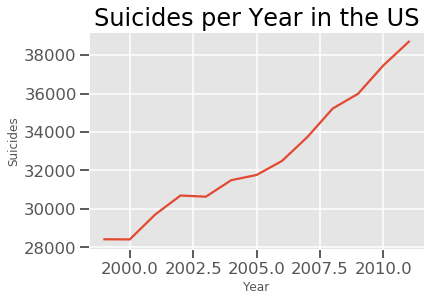

In [3]:
plt.plot(suicides.groupby('Year').sum().Deaths)
plt.title('Suicides per Year in the US', size=24)
plt.xlabel('Year')
plt.ylabel('Suicides');

## Hypothesis 1 - winter gets more suicides than summer

_TODO: write out hypothesis more explicitly, significance level_

One-tailed t-test: t-statistic: 9.489; p-value: 1.6878494061784511e-21
Cohen's D score: 0.253


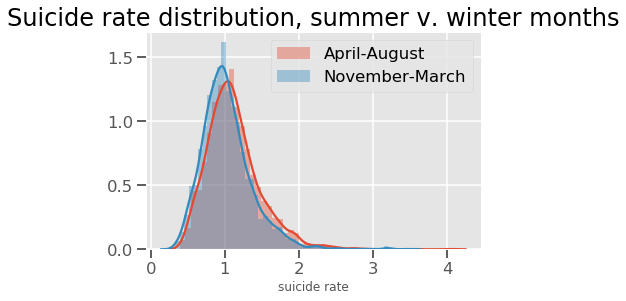

In [4]:
summer_v_winter(suicides, 'suicide_rate')

_TODO: add bullets, more explicit analysis_

Looks like summer has more suicides than winter.

## Let's cancel out year effect

In [5]:
suicides_by_month = data_by_month(suicides)
suicides_by_month.head()

,Month,State,State Code,Deaths,Population,suicide_rate,avg_max_t,avg_min_t,avg_max_heat_index
0,1,Alabama,1.0,51.692308,4.599187e+06,1.121179,54.712308,35.743077,82.570000
1,1,Arizona,4.0,77.692308,5.809299e+06,1.337000,51.595385,35.239231,79.032000
2,1,Arkansas,5.0,31.461538,2.790312e+06,1.127626,50.200769,32.541538,81.796667
3,1,California,6.0,294.615385,3.570468e+07,0.824524,51.926154,37.538462,79.385000
4,1,Colorado,8.0,68.230769,4.670093e+06,1.457071,34.466923,19.360769,NaN


One-tailed t-test: t-statistic: 2.742; p-value: 0.00316887929700719
Cohen's D score: 0.256


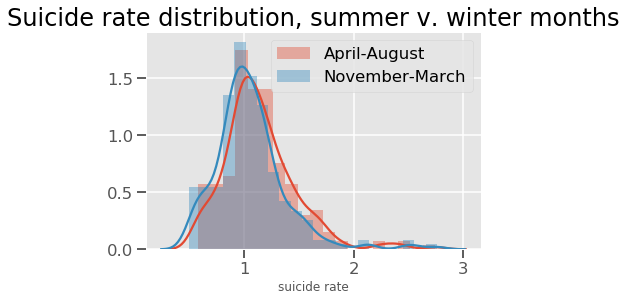

In [6]:
summer_v_winter(suicides_by_month, 'suicide_rate')

Paired t-test. Compare the sum of the months against the mean of the months

Paired t-test: t-statistic: 11.118; p-value: 1.5193601960159718e-23
Cohen's d: 0.256


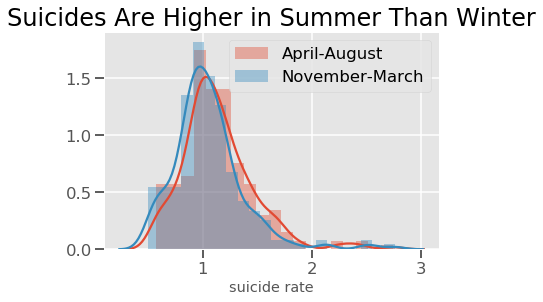

In [7]:
summer_by_month = suicides_by_month.query('4 <= Month <= 8')
winter_by_month = suicides_by_month.query('Month <= 3 or Month >= 11')
sns.distplot(summer_by_month.suicide_rate, label='April-August')
sns.distplot(winter_by_month.suicide_rate, label='November-March')
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)

plt.xlabel('suicide rate', size='x-large')
plt.title('Suicides Are Higher in Summer Than Winter',size=24)
sns.set_context("talk")
plt.style.use('ggplot')
t_stat, p_value = stats.ttest_rel(summer_by_month.suicide_rate, winter_by_month.suicide_rate)
print(f"Paired t-test: t-statistic: {t_stat:.03f}; p-value: {p_value / 2}")
print("Cohen's d: {:.03f}".format(cohen_d(winter_by_month.suicide_rate, summer_by_month.suicide_rate)))

Nope, in fact spring & summer are worse than winter!

## Extreme heat in summer

### High heat has no significant effect

_TODO: explicit hypothesis_

In [8]:
summer = suicides.query('4 <= Month <= 9')

One-tailed t-test: t-statistic: -5.295; p-value: 0.000000
Cohen's d: 0.412


Text(0.5, 1.0, 'Suicide Rate During\nWarm v. Cool Summer Months')

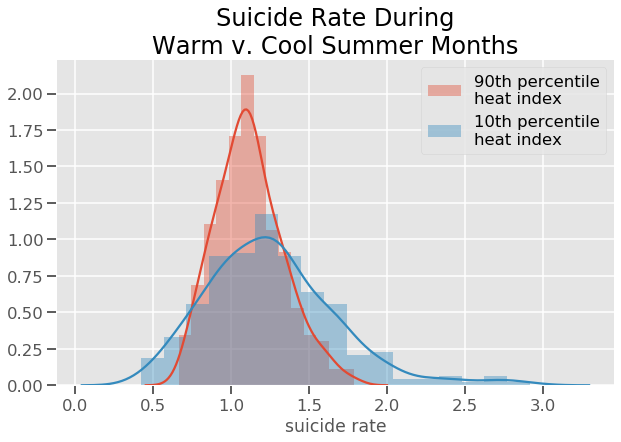

In [9]:
top_v_bottom(.1, summer, 'avg_max_heat_index', 'suicide_rate', var_name='heat index')
plt.title("Suicide Rate During\nWarm v. Cool Summer Months", size=24)

_TODO: explicit results_

### Unusually high heat does have a significant effect

_TODO: explicit hypothesis, explicit definition of unusually high heat_

One-tailed t-test: t-statistic: 4.836; p-value: 0.000001
Cohen's d: 0.378


Text(0.5, 1.0, 'Suicide Rate During\nUnusually Warm v. Cool Summer Months')

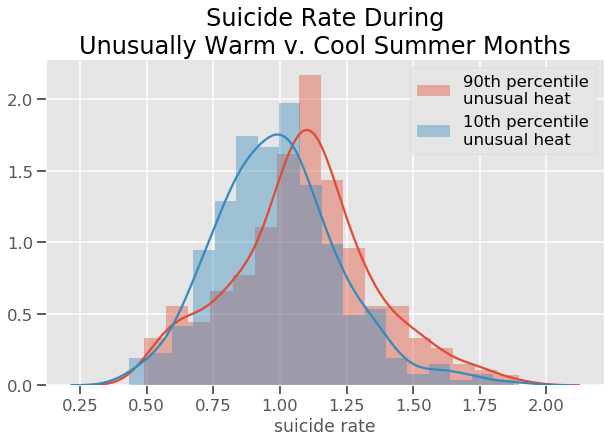

In [10]:
top_v_bottom(.1, summer, 'heat_index_diff', 'suicide_rate')
plt.title("Suicide Rate During\nUnusually Warm v. Cool Summer Months", size=24)

_TODO: results explanation_

### Particularly in the Southeast

One-tailed t-test: t-statistic: 4.402; p-value: 0.000011
Cohen's d: 0.784


Text(0.5, 1.0, 'Suicide Rate During Unusual Heat,\nSoutheastern U.S.')

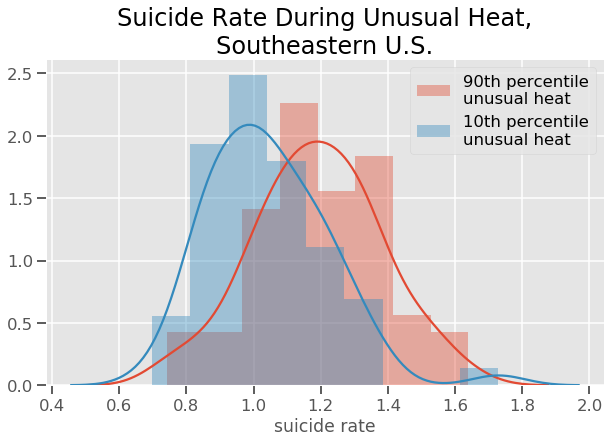

In [11]:
southeast = ("Alabama", "Florida", "Georgia", "Kentucky", "Mississippi", 
             "North Carolina", "South Carolina", "Tennessee")
top_v_bottom(.1, summer[summer.State.isin(southeast)], 'heat_index_diff', 'suicide_rate')
plt.title("Suicide Rate During Unusual Heat,\nSoutheastern U.S.", size=24)

### No significant effect in Northeast (for example)

One-tailed t-test: t-statistic: 0.182; p-value: 0.427915
Cohen's d: 0.036


Text(0.5, 1.0, 'Northeast')

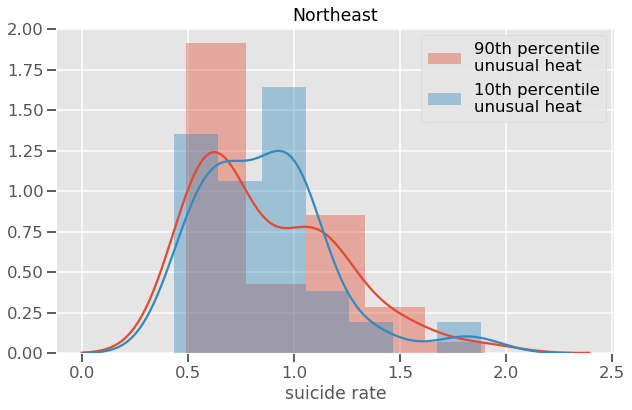

In [12]:
northeast = ("Connecticut", 'Maine', "Massachusetts", "New Hampshire", 
             "Rhode Island", "Vermont", "New Jersey", "New York", "Pennsylvania")
top_v_bottom(.1, summer[summer.State.isin(northeast)], 'heat_index_diff', 'suicide_rate')
plt.title('Northeast',size='xx-large')

## It's possible we're seeing a year effect in our extreme-heat analysis

One-tailed t-test: t-statistic: 10.425; p-value: 0.000000
Cohen's d: 0.654


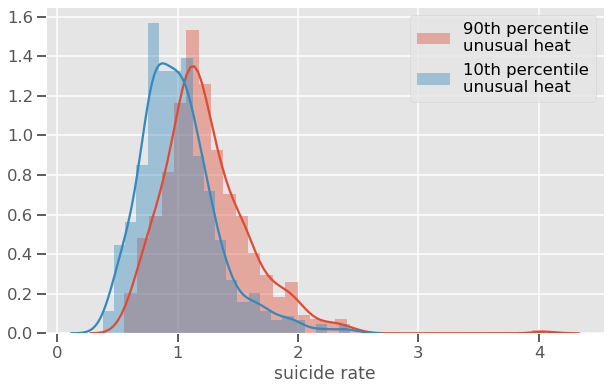

In [13]:
top_v_bottom(.1, summer, 'Year', 'suicide_rate')

### Multivariate linear regression 

In [14]:
X = summer.dropna()[['Year','Month','heat_index_diff', 'min_t_diff', 'max_t_diff']].copy()
X = sm.add_constant(X)
Y = summer.dropna()['suicide_rate']
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           suicide_rate   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     26.74
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           1.39e-26
Time:                        08:33:26   Log-Likelihood:                -1254.3
No. Observations:                3277   AIC:                             2521.
Df Residuals:                    3271   BIC:                             2557.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -35.3891      3.469    -10.200      0.000     -42.192     -28.587
Year                0.0182      0.002     10.531      0.000       0.015       0.022
Month              -0.0050      0.004     -1.343      0.179      -0.012       0.002
heat_index_diff     0.0020      0.004      0.528      0.598      -0.005       0.010
min_t_diff          0.0053      0.005      1.110      0.267      -0.004       0.015
max_t_diff          0.0003      0.004      0.076      0.940      -0.007       0.008
==============================================================================
Omnibus:                      793.168   Durbin-Watson:                   0.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2460.804
Skew:                           1.225   Prob(JB):                         0.00
Kurtosis:                       6.467   Cond. No.                     1.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
results.tvalues

const             -10.200099
Year               10.531145
Month              -1.343232
heat_index_diff     0.527775
min_t_diff          1.110193
max_t_diff          0.075898
dtype: float64

## Are suicides by state independent from suicides by year? Chi-square analysis

In [16]:
suicides_by_state_and_year = pd.pivot_table(suicides, 
                                            index='State', 
                                            values='suicide_rate', 
                                            columns='Year', aggfunc=np.mean).dropna()

In [17]:
stats.chisquare(suicides_by_state_and_year)

Power_divergenceResult(statistic=array([5.05476847, 4.39696343, 6.21651177, 5.71961632, 5.43219468,
       3.76302718, 5.94285027, 4.4409578 , 4.81208836, 4.12744494,
       4.53818385, 3.6478799 , 3.78775879]), pvalue=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

Conclusion: They are not independent of each other.

## Mapping the data

Add state two-letter codes to suicides file:

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

In [19]:
suicides = suicides.merge(df[['state','code']], left_on='State', right_on='state').drop(columns='state')

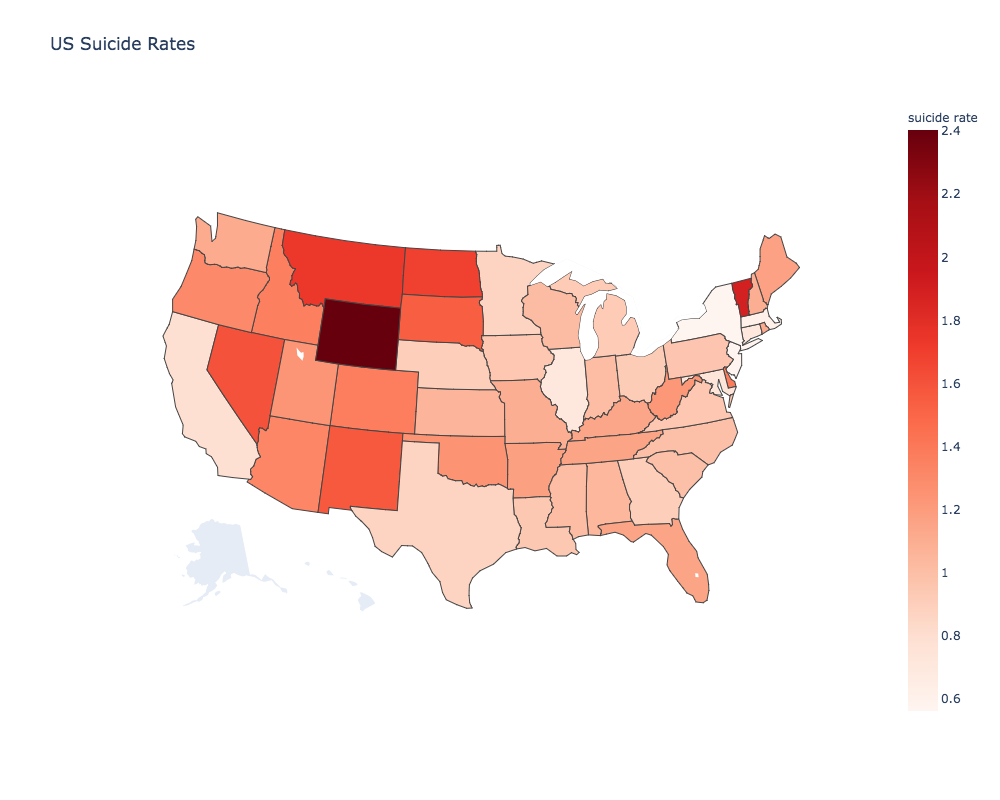

In [20]:
fig = go.Figure(data=go.Choropleth(
    locations=suicides.groupby('code').mean().index, # Spatial coordinates
    z = suicides.groupby('code').mean().suicide_rate, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "suicide rate",
))
fig.update_layout(
    title_text = 'US Suicide Rates',
    geo_scope='usa', # limit map scope to USA
)
fig.show(renderer="png", width=1000, height=800)

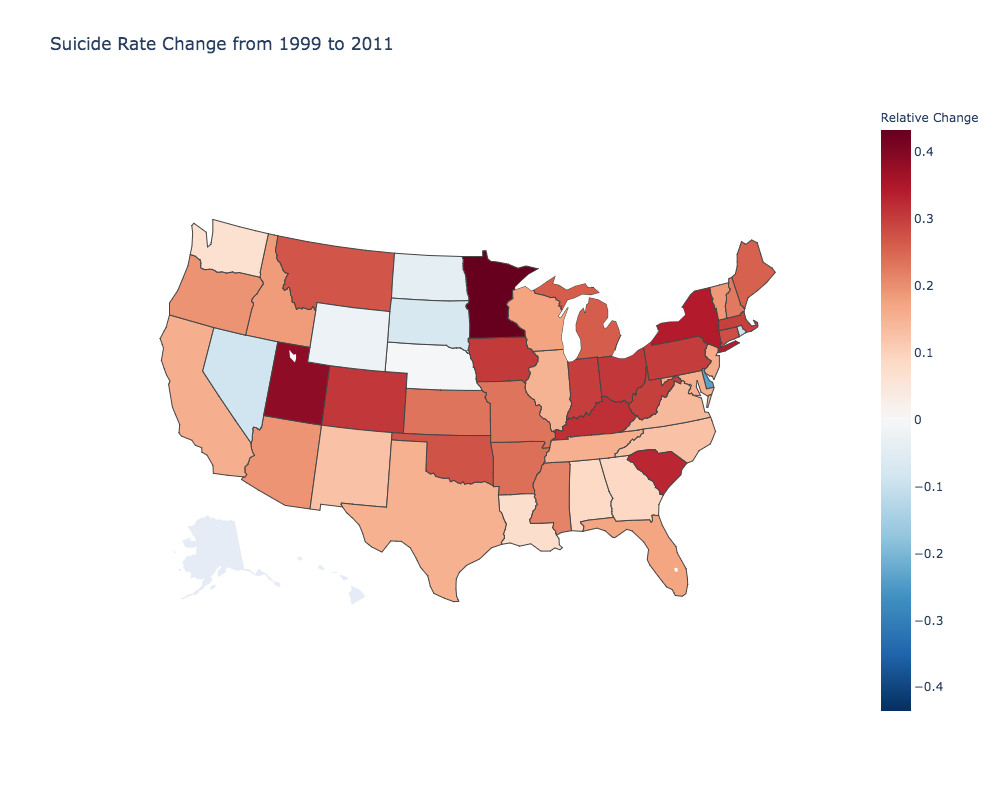

In [21]:
fig = go.Figure(data=go.Choropleth(
    locations=suicides.groupby('code').mean().index, # Spatial coordinates
    z = (suicides.query('Year == 2011').groupby('code').mean().suicide_rate 
        - suicides.query('Year == 1999').groupby('code').mean().suicide_rate) / suicides.query('Year == 1999').groupby('code').mean().suicide_rate, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale='RdBu',
    reversescale=True,
    zmid=0,
    colorbar_title = "Relative Change",
))
fig.update_layout(
    title_text = "Suicide Rate Change from 1999 to 2011",
    geo_scope='usa', # limit map scope to USA
)
fig.show(renderer="png", width=1000, height=800)

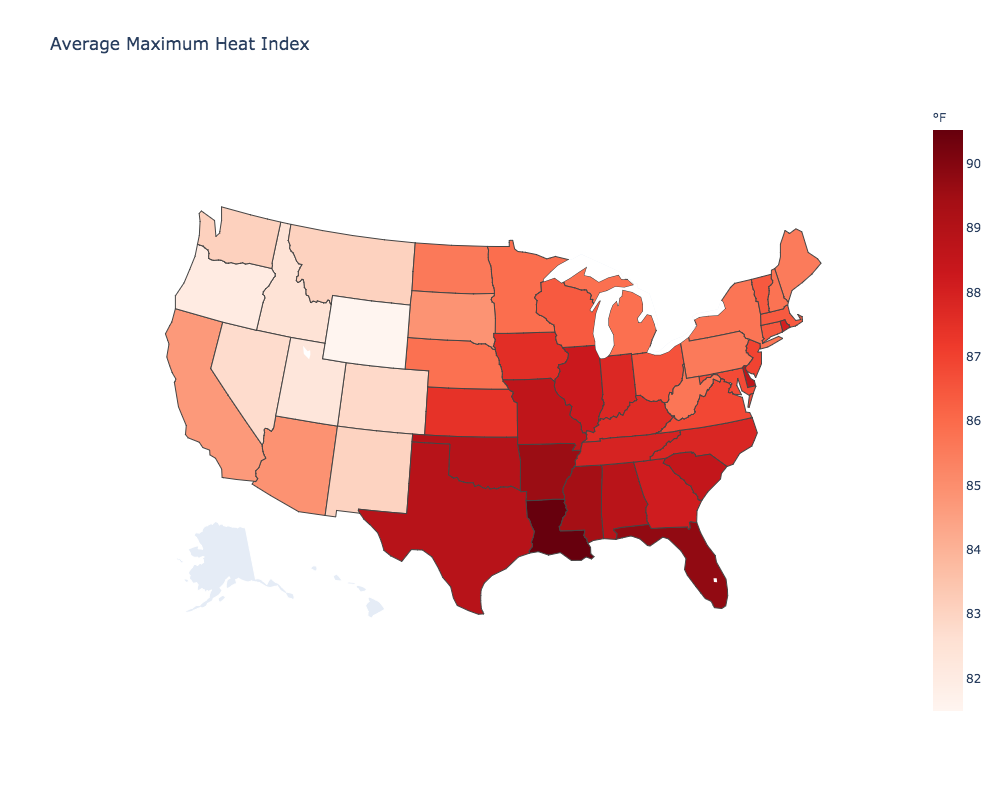

In [22]:
fig = go.Figure(data=go.Choropleth(
    locations=suicides.groupby('code').mean().index, # Spatial coordinates
    z = suicides.groupby('code').mean().avg_max_heat_index, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "°F",
))
fig.update_layout(
    title_text = 'Average Maximum Heat Index',
    geo_scope='usa', # limit map scope to USA
)
fig.show(renderer="png", width=1000, height=800)

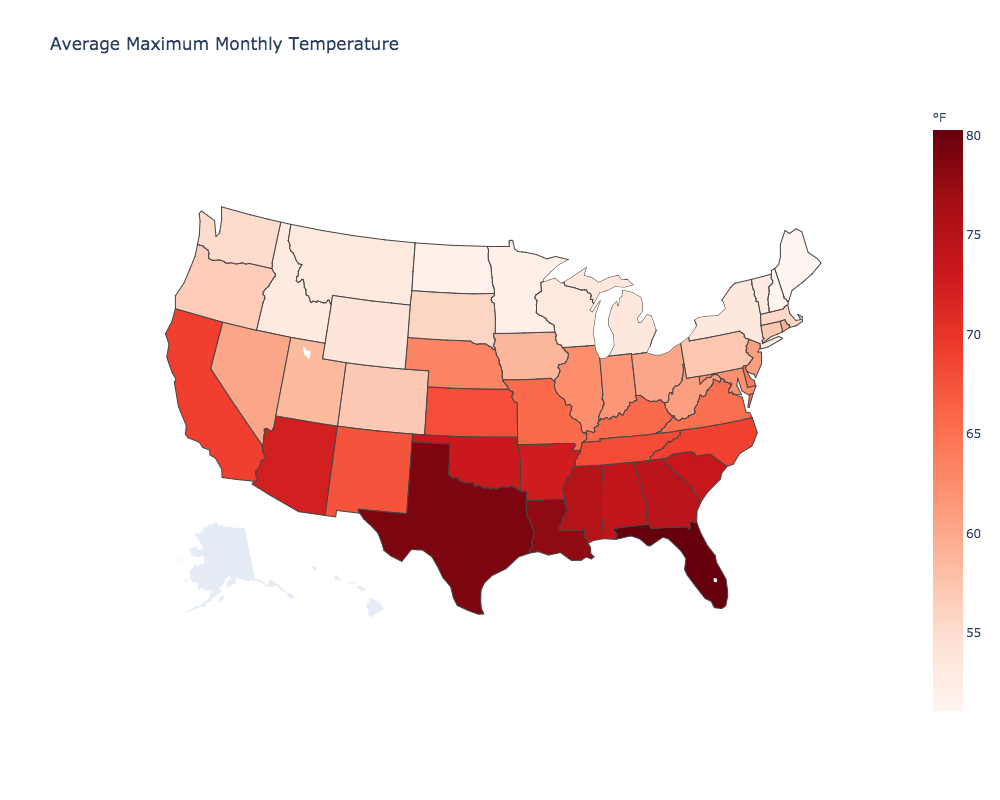

In [23]:
fig = go.Figure(data=go.Choropleth(
    locations=suicides.groupby('code').mean().index, # Spatial coordinates
    z = suicides.groupby('code').mean().avg_max_t, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "°F",
))
fig.update_layout(
    title_text = 'Average Maximum Monthly Temperature',
    geo_scope='usa', # limit map scope to USA
)
fig.show(renderer="png", width=1000, height=800)

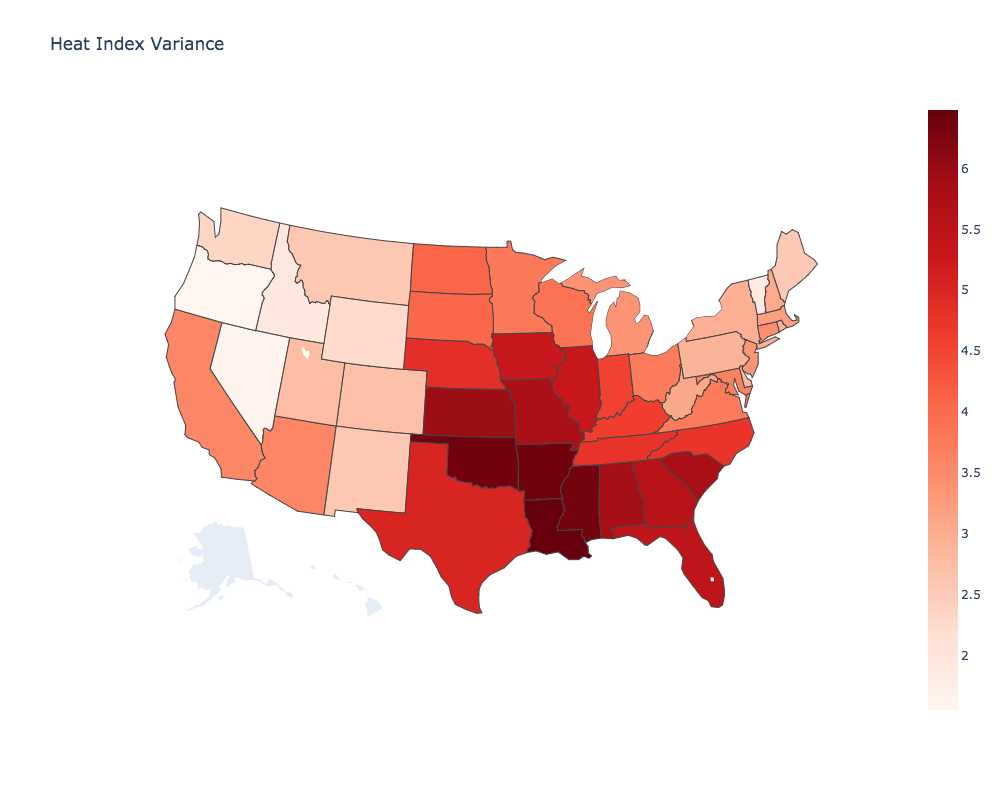

In [24]:
fig = go.Figure(data=go.Choropleth(
    locations=suicides.query('3 < Month < 9').groupby('code').mean().index, # Spatial coordinates
    z = suicides.query('3 < Month < 9').groupby('code').std().avg_max_heat_index, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
))
fig.update_layout(
    title_text = 'Heat Index Variance',
    geo_scope='usa', # limit map scope to USA
)
fig.show(renderer="png", width=1000, height=800)

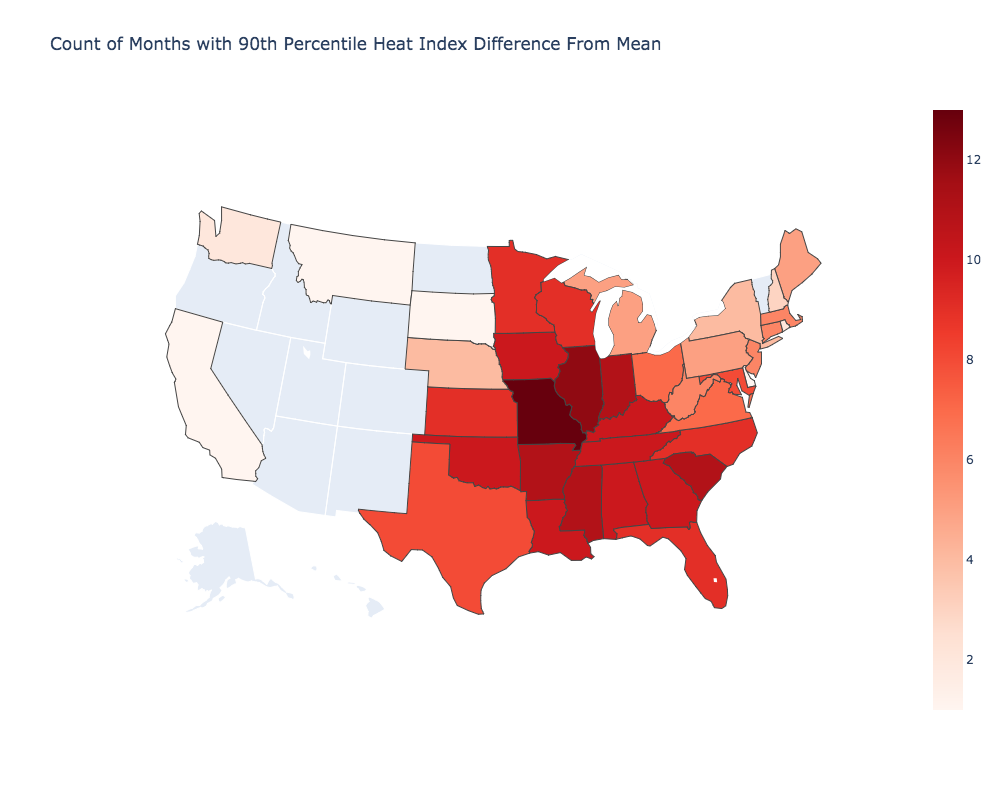

In [25]:
q_diff_90 = np.quantile(suicides.query('3 < Month < 9').dropna().heat_index_diff, .9)
fig = go.Figure(data=go.Choropleth(
    locations=suicides.query(f'3 < Month < 9 & heat_index_diff >= {q_diff_90}').groupby('code').count().index, # Spatial coordinates
    z = suicides.query(f'3 < Month < 9 & heat_index_diff >= {q_diff_90}').groupby('code').count().heat_index_diff, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
#    colorbar_title = "Millions USD",
))
fig.update_layout(
    title_text = 'Count of Months with 90th Percentile Heat Index Difference From Mean',
    geo_scope='usa', # limit map scope to USA
)
fig.show(renderer="png", width=1000, height=800)

Text(0.5, 1.0, 'Count of extremely unusual heat index months')

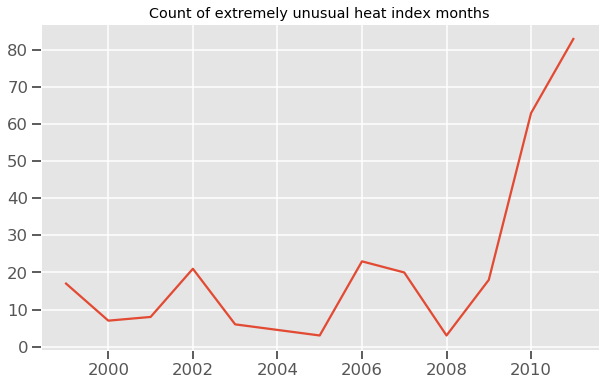

In [26]:
plt.plot(suicides.query(f'3 < Month < 9 & heat_index_diff >= {q_diff_90}').groupby('Year').count().State)
plt.title("Count of extremely unusual heat index months")